In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
data.shape

(7920, 3)

In [5]:
#chech data duplicated
data.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
7915    False
7916    False
7917    False
7918    False
7919    False
Length: 7920, dtype: bool>

In [6]:
#check null values
data.isnull().sum

<bound method DataFrame.sum of          id  label  tweet
0     False  False  False
1     False  False  False
2     False  False  False
3     False  False  False
4     False  False  False
...     ...    ...    ...
7915  False  False  False
7916  False  False  False
7917  False  False  False
7918  False  False  False
7919  False  False  False

[7920 rows x 3 columns]>

### Text Preprocessing

In [7]:
import re
import string #for punctuations

In [8]:
data["tweet"].head(10)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
5    iPhone software update fucked up my phone big ...
6    Happy for us .. #instapic #instadaily #us #son...
7    New Type C charger cable #UK http://www.ebay.c...
8    Bout to go shopping again listening to music #...
9    Photo: #fun #selfie #pool #water #sony #camera...
Name: tweet, dtype: object

### Convert uppercase to lowercase

In [9]:
# convert capital to simple
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [10]:
data

,id,label,tweet
0,1,0,#fingerprint #pregnancy test https://goo.gl/h1...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...
...,...,...,...
7915,7916,0,live out loud #lol #liveoutloud #selfie #smile...
7916,7917,0,we would like to wish you an amazing day! make...
7917,7918,0,helping my lovely 90 year old neighbor with he...
7918,7919,0,finally got my #smart #pocket #wifi stay conne...


In [11]:
data["tweet"].head(10)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
5    iphone software update fucked up my phone big ...
6    happy for us .. #instapic #instadaily #us #son...
7    new type c charger cable #uk http://www.ebay.c...
8    bout to go shopping again listening to music #...
9    photo: #fun #selfie #pool #water #sony #camera...
Name: tweet, dtype: object

### remove links

In [12]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))


In [13]:
data["tweet"].head(10)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
5    iphone software update fucked up my phone big ...
6    happy for us .. #instapic #instadaily #us #son...
7    new type c charger cable #uk  … #bay #amazon #...
8    bout to go shopping again listening to music #...
9    photo: #fun #selfie #pool #water #sony #camera...
Name: tweet, dtype: object

### remove punctuations

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def remove_punctuations (text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
    
data["tweet"] = data["tweet"].apply(remove_punctuations)

In [16]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

### remove numbers

In [17]:
data["tweet"] = data["tweet"].str.replace('\d+','',regex=True)

In [18]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

### Remove stopwords

In [19]:
!pip install nltk

In [20]:
import nltk

In [21]:
nltk.download('stopwords',download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
with open('../static/model/corpora/stopwords/english','r') as file:
    sw = file.read().splitlines()

In [23]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [24]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [25]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [26]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    completely love new iphone emojis iphone apple...
7912    tune turn drop gtd one app mobile mind meditat...
7913    ok galaxy crashed one day wait til monday skyr...
7914    gain followers rt must follow follow back foll...
7915    live loud lol liveoutloud selfie smile sony mu...
7916    would like wish amazing day make every minute ...
7917    helping lovely year old neighbor ipad morning ...
7918    finally got smart pocket wifi stay connected a...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

### stemming

In [27]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [28]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [29]:
data["tweet"].head(10)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
5    iphon softwar updat fuck phone big time stupid...
6    happi us instap instadaili us soni xperia xperiaz
7    new type c charger cabl uk … bay amazon etsi n...
8    bout go shop listen music iphon justm music li...
9    photo fun selfi pool water soni camera picofth...
Name: tweet, dtype: object

### Building Vocabulary

In [30]:
from collections import Counter

In [31]:
vocab = Counter()

In [32]:
# find unique words
for sentence in data["tweet"]:
    vocab.update(sentence.split())


In [33]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [34]:
#total vocabulary
len(vocab)

15949

In [35]:
data.shape

(7920, 3)

In [90]:
#reduce columns for handle overfitting
tokens=[key for key in vocab if vocab[key]>15]

In [91]:
len(tokens)

831

In [92]:
#get unique words list
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename,'w',encoding='utf-8')
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

### divide dataset

In [93]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [94]:
x=data['tweet']
y=data['label']

In [95]:
!pip install scikit-learn

In [96]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [97]:
x_train.shape , x_test.shape, y_train.shape , y_test.shape

((6336,), (1584,), (6336,), (1584,))

In [98]:
x_train


1779    pc exquisit squishi random charm iphon strap t...
2859    iphon gener iphon fun hashtag boy girl game li...
7879    monday usual pretti lame samsungmobileu samsun...
7775            phone fuck let type facebook twitter text
1946    america go hack soni see theinterviewmovi sony...
                              ...                        
5715    appl enabl video iphon g g via beler x fp vide...
3696    appl mac airbook hd fail year use wtf appl fai...
5468                               aw ff get iphon itun u
4766    everi time instal io iphon keep lockingitin df...
5533        whole famili teamiphon except momma teamdroid
Name: tweet, Length: 6336, dtype: object

### Vectorization

In [99]:
#convert "tweet" values to numerical values
def vectorizer(ds,vocabulary):
    vectorized_lst = []

    for sentence in ds:
        sentence_lst=np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i]=1

        vectorized_lst.append(sentence_lst)

    vectorized_lst_new = np.asarray(vectorized_lst,dtype=np.float32)

    return vectorized_lst_new


In [100]:
vectorized_x_train = vectorizer(x_train,tokens)

In [101]:
vectorized_x_train


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 831), dtype=float32)

In [102]:
# see the first row after vectorization
for i in vectorized_x_train[0]:
    print(i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [103]:
vectorized_x_test=vectorizer(x_test,tokens)

In [104]:
# see the first row after vectorization
for i in vectorized_x_test[0]:
    print(i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [105]:
vectorized_x_test = vectorizer(x_test,tokens)

In [106]:
# see the first row after vectorization

In [107]:
for i in vectorized_x_test[0]:
    print(i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [108]:
y_test.value_counts()

label
0    1197
1     387
Name: count, dtype: int64

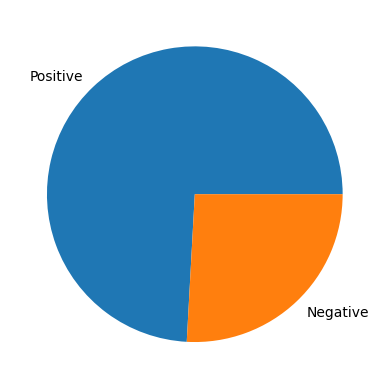

In [109]:
# Plot
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

### Handle imbalanced datasetab

In [110]:
!pip install scikit-learn

In [111]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9394, 831) (9394,)


In [112]:
y_train_smote.value_counts()

label
0    4697
1    4697
Name: count, dtype: int64

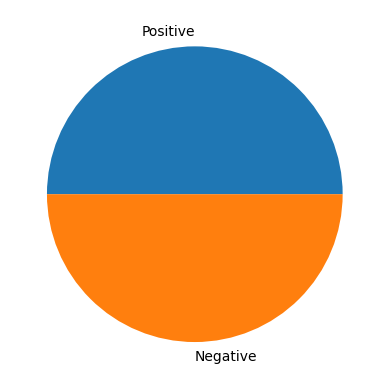

In [113]:
# Plot
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

### Model Training and Evaluation

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [115]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

#check training accuracy
def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
# check testing accuracy
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression

In [116]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.929
	Precision = 0.904
	Recall = 0.961
	F1-Score = 0.932
Testing Scores:
	Accuracy = 0.859
	Precision = 0.666
	Recall = 0.85
	F1-Score = 0.747


### Naive Bayes

In [118]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.9
	Precision = 0.868
	Recall = 0.944
	F1-Score = 0.905
Testing Scores:
	Accuracy = 0.848
	Precision = 0.631
	Recall = 0.917
	F1-Score = 0.747


### Decision Tree

In [120]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.999
	Precision = 1.0
	Recall = 0.999
	F1-Score = 0.999
Testing Scores:
	Accuracy = 0.825
	Precision = 0.64
	Recall = 0.651
	F1-Score = 0.645


### Random Forest

In [121]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.999
	Precision = 0.999
	Recall = 0.999
	F1-Score = 0.999
Testing Scores:
	Accuracy = 0.863
	Precision = 0.716
	Recall = 0.729
	F1-Score = 0.722


### Support Vector Machine

In [123]:
svm = SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.973
	Precision = 0.954
	Recall = 0.993
	F1-Score = 0.973
Testing Scores:
	Accuracy = 0.867
	Precision = 0.7
	Recall = 0.801
	F1-Score = 0.747


In [124]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a helper function to evaluate models
def evaluate_model(name, y_true, y_pred):
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

# Evaluate each model
results = []

results.append(evaluate_model("Logistic Regression", y_test, lr.predict(vectorized_x_test)))
results.append(evaluate_model("Naive Bayes", y_test, mnb.predict(vectorized_x_test)))
results.append(evaluate_model("Decision Tree", y_test, dt.predict(vectorized_x_test)))
results.append(evaluate_model("Random Forest", y_test, rf.predict(vectorized_x_test)))
results.append(evaluate_model("SVM", y_test, svm.predict(vectorized_x_test)))

# Sort by F1 score (or Accuracy if you prefer)
results_sorted = sorted(results, key=lambda x: x['F1 Score'], reverse=True)

# Display all models sorted by performance
import pandas as pd
results_df = pd.DataFrame(results_sorted)
print(results_df)

# Best model
best_model = results_sorted[0]
print(f"\n✅ Best Model: {best_model['Model']} with F1 Score = {best_model['F1 Score']:.3f}")


                 Model  Accuracy  Precision    Recall  F1 Score
0          Naive Bayes  0.848485   0.630551  0.917313  0.747368
1                  SVM  0.867424   0.699774  0.801034  0.746988
2  Logistic Regression  0.859217   0.665992  0.850129  0.746879
3        Random Forest  0.863005   0.715736  0.728682  0.722151
4        Decision Tree  0.825126   0.639594  0.651163  0.645327

✅ Best Model: Naive Bayes with F1 Score = 0.747


In [126]:
#use the pickle module in Python to save your best-performing model (in this case, SVM) to a file, and load it later for predictions without retraining.

import pickle

with open('../static/model/model.pickle','wb') as file:
    pickle.dump(mnb,file)
